# Feature importance

Notes:
* This notebook only inspects 1 experiment (`pca64_subsets_gpt4_mae`)
* Each experiment has 25 cv-folds, therefore each feature has 25 importance scores
* The importance scores are normalized to sum to one (within each fold)

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt


from experimentation.metadata_helpers import (
    extract_feature_importance,
    PCA_FG,
    GPT_FG,
    X_REF_FG,
    SUBSETS_FG,
    TOPO_FG,
)

sns.set_theme()
# Since updating Pandas, seaborn is throwing a lot of pandas FutureWarning :(
warnings.simplefilter(action="ignore", category=FutureWarning)

## Feature importance: Non-aggregated 

In [2]:
# Ordered by median feature importance
df = extract_feature_importance("20230919_231920_pca64_subsets_gpt4_mae")

### Top 15 features

<Axes: xlabel='importance', ylabel='feature'>

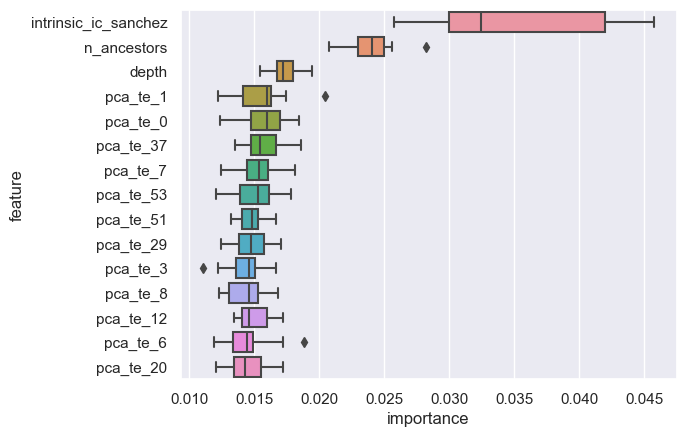

In [3]:
top_15_features = df["feature"].drop_duplicates()[:15]
sns.boxplot(data=df[df["feature"].isin(top_15_features)], x="importance", y="feature")

### Bottom 15 features

<Axes: xlabel='importance', ylabel='feature'>

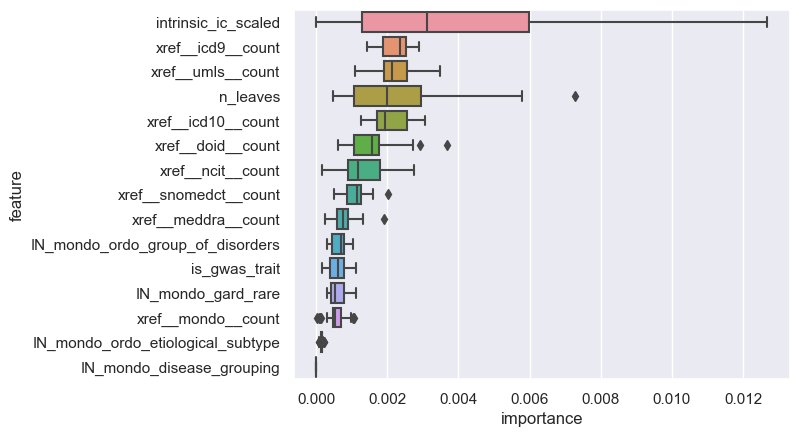

In [4]:
bottom_15_features = df["feature"].drop_duplicates()[-15:]
sns.boxplot(
    data=df[df["feature"].isin(bottom_15_features)], x="importance", y="feature"
)

## Feature importance: Groupped

Some features, which are related to each other, are groupped (summed) - Groups:
* PCA features: `pca_fg`
* XREF features: `xref_fg`
* GPT Tags features: `gpt_tags_fg`
* Subsets features: `subsets_fg`
* n_* (topological counts): `n_fg`

<Axes: xlabel='importance', ylabel='feature'>

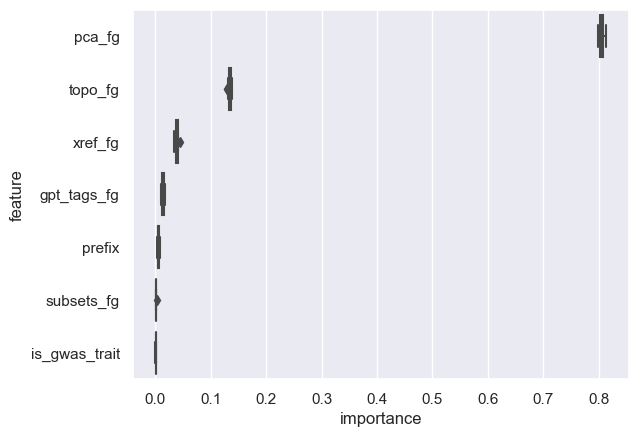

In [5]:
df_groupped = extract_feature_importance(
    "20230919_231920_pca64_subsets_gpt4_mae",
    feature_groups=[PCA_FG, GPT_FG, X_REF_FG, SUBSETS_FG, TOPO_FG],
)
sns.boxplot(data=df_groupped, x="importance", y="feature")

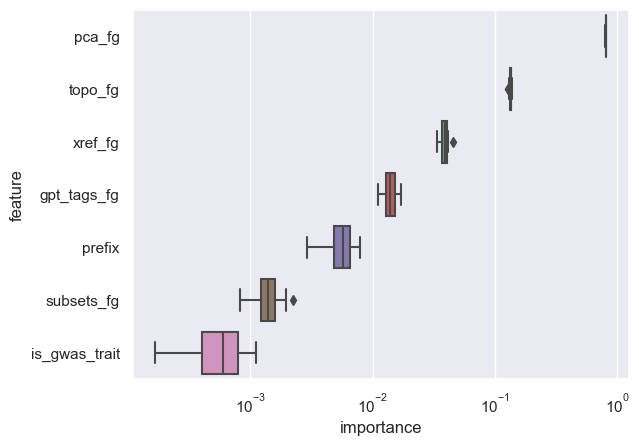

In [6]:
# Log version
sns.boxplot(data=df_groupped, x="importance", y="feature")
plt.xscale("log")

In [7]:
df_groupped.groupby("feature")["importance"].describe().sort_values(
    by="50%", ascending=False
)

,count,mean,std,min,25%,50%,75%,max
feature,,,,,,,,
pca_fg,25.0,0.805052,0.003682,0.799147,0.802482,0.804723,0.807448,0.813786
topo_fg,25.0,0.134652,0.002703,0.128948,0.133664,0.135551,0.136648,0.137986
xref_fg,25.0,0.038705,0.002524,0.033963,0.037266,0.038995,0.040254,0.045230
gpt_tags_fg,25.0,0.014071,0.001686,0.011111,0.012783,0.013904,0.015284,0.017211
prefix,25.0,0.005517,0.001346,0.002927,0.004868,0.005707,0.006551,0.007902
subsets_fg,25.0,0.001414,0.000325,0.000828,0.001224,0.001405,0.001586,0.002221
is_gwas_trait,25.0,0.000590,0.000249,0.000168,0.000401,0.000605,0.000793,0.001118


## Appendix: All features

In [8]:
pd.set_option("display.max_rows", None)
df.groupby("feature")["importance"].describe().sort_values(by="50%", ascending=False)

,count,mean,std,min,25%,50%,75%,max
feature,,,,,,,,
intrinsic_ic_sanchez,25.0,0.035251,0.006774,0.025731,0.029948,0.032443,0.041949,0.045742
n_ancestors,25.0,0.023730,0.001677,0.020702,0.022991,0.024035,0.024944,0.028172
depth,25.0,0.017354,0.000982,0.015450,0.016732,0.017227,0.017964,0.019404
pca_te_1,25.0,0.015339,0.001835,0.012230,0.014095,0.015934,0.016260,0.020428
pca_te_0,25.0,0.015713,0.001606,0.012329,0.014720,0.015930,0.016988,0.018457
pca_te_37,25.0,0.015726,0.001563,0.013532,0.014739,0.015408,0.016634,0.018619
pca_te_7,25.0,0.015392,0.001290,0.012412,0.014447,0.015368,0.016044,0.018117
pca_te_53,25.0,0.015105,0.001540,0.012053,0.013878,0.015269,0.016090,0.017781
pca_te_51,25.0,0.014714,0.000949,0.013208,0.014033,0.014819,0.015293,0.016659


In [9]:
df.groupby("fold").describe()

importance                                                         \
          count      mean       std  min       25%       50%       75%   
fold                                                                     
0          97.0  0.010309  0.005985  0.0  0.008299  0.011669  0.013346   
1          97.0  0.010309  0.005426  0.0  0.008704  0.011349  0.013172   
2          97.0  0.010309  0.005906  0.0  0.006731  0.011540  0.013313   
3          97.0  0.010309  0.005465  0.0  0.007752  0.011426  0.013283   
4          97.0  0.010309  0.005929  0.0  0.006325  0.011592  0.012857   
5          97.0  0.010309  0.006033  0.0  0.008625  0.011186  0.013390   
6          97.0  0.010309  0.005376  0.0  0.006290  0.011844  0.013502   
7          97.0  0.010309  0.005352  0.0  0.007327  0.011721  0.013351   
8          97.0  0.010309  0.005351  0.0  0.006551  0.011631  0.013465   
9          97.0  0.010309  0.005997  0.0  0.005993  0.011301  0.013176   
10         97.0  0.010309  0.006111  0.0  0.006693  0.011146  0.013349   
11         97.0  0.010309  0.006259  0.0  0.006780  0.011664  0.013393   
12         97.0  0.010309  0.005617  0.0  0.007739  0.011489  0.013200   
13         97.0  0.010309  0.005330  0.0  0.007925  0.011561  0.013287   
14         97.0  0.010309  0.005463  0.0  0.006169  0.011204  0.013389   
15         97.0  0.010309  0.005309  0.0  0.008123  0.011513  0.013244   
16         97.0  0.010309  0.005469  0.0  0.006607  0.011764  0.013292   
17         97.0  0.010309  0.006016  0.0  0.007004  0.011316  0.012789   
18         97.0  0.010309  0.005895  0.0  0.005759  0.011285  0.013783   
19         97.0  0.010309  0.005459  0.0  0.007417  0.011230  0.013902   
20         97.0  0.010309  0.005555  0.0  0.006713  0.011280  0.013784   
21         97.0  0.010309  0.006274  0.0  0.006649  0.011085  0.013095   
22         97.0  0.010309  0.005871  0.0  0.007897  0.011385  0.013151   
23         97.0  0.010309  0.005596  0.0  0.006346  0.011352  0.013641   
24         97.0  0.010309  0.005436  0.0  0.006767  0.011439  0.013531   

                
           max  
fold            
0     0.041145  
1     0.034566  
2     0.041949  
3     0.030921  
4     0.041020  
5     0.043573  
6     0.026100  
7     0.027689  
8     0.031164  
9     0.043574  
10    0.042512  
11    0.045742  
12    0.032443  
13    0.026213  
14    0.030857  
15    0.028165  
16    0.029948  
17    0.042550  
18    0.039948  
19    0.025731  
20    0.030689  
21    0.043310  
22    0.040374  
23    0.031185  
24    0.029898